In [1]:
%matplotlib inline

import sympy as sp
sp.init_printing(use_latex ='mathjax')
import scipy as sc
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import lmfit as lf
import os
import seaborn as sns
from lmfit import Model
import lmfit
from tabulate import tabulate
import matplotlib
import matplotlib.gridspec as gridspec

from myheatmap import myheatmap
#from mySingleResonatorFunction import amplitude, phase

sns.set_context('poster') # makes text larger (poster) or smaller (paper)

In [2]:
# mac vs PC
mac = False

In [3]:
#Determine amplitude and phase of each resonator for lower and higher frequency modes based on mode map

#Define function to mask mode maps
def maskplot(df, mk, column, uselog=False, cbarlims = None, **kwargs):
    rlogmkname = column + 'logmk'
    rmkname = column + 'mk'
    df[rlogmkname] = np.log10(df[column][mk]) 
    df[rmkname] = df[column][mk]

    if uselog:
        values = rlogmkname
    else:
        values = rmkname
    dfgrid = df.pivot_table(index = 'Green Y', columns = 'Green X', values = values).sort_index(axis = 0, ascending = False)
    ax,cbar = myheatmap(dfgrid, values, return_cbar = True, **kwargs)
    plt.xlabel(u'$x$ (μm)')
    plt.ylabel(u'$y$ (μm)')
    plt.gca().axis('equal')
    return ax, cbar

#Define number of points averaged for amplitude and phase
n_amp = 10
n_phase = 10

In [4]:
from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar


"""
openandplotmodemap()
path: the data file path, not including Demod1.csv
cmap_amp: a cmap for the amplitude mode map
cmap_phase: a cmap for the phase mode map
amp_plot: either 'r' or 'rlog'
savefolder: A folder where this function will save an image (or None if you don't want to save)
format: 'png' or 'pdf' or whatever format you want for the saved image.

useage:
df, ax1, ax2, cbar1, cbar2 = openandplotmodemap(path)
"""
def openandplotmodemap(filepath, 
                       figsize=(13.23,5), 
                       cmap_amp = 'Greys', cmap_phase = 'twilight_shifted', 
                       amp_plot = 'rlog', 
                       savefolder = None,
                       format = 'png',
                       **kwargs):   
    df = pd.read_csv(os.path.join(filepath, 'Demod1.csv'), skiprows = 2)
    df['w'] = df.frequency * 2 * np.pi

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=figsize)

    plt.sca(ax1)
    df['rlog'] = np.log10(df.r) 
    amp1 = df.pivot_table(index = 'Green Y', columns = 'Green X', values = amp_plot).sort_index(axis = 0, ascending = False) 
    axx, cbar1 = myheatmap(amp1, amp_plot, cmap = cmap_amp, return_cbar=True); # amp_plot can be 'rlog' or 'r'
    #plt.xlabel(u'$x$ [μm]')
    #plt.ylabel(u'$y$ [μm]')
    ax1.set_title(str(round(df.frequency[0]/1e6,3))+ ' MHz')
    
    if amp_plot == 'rlog':
        # Rewrite the cbar labels
        cbar_labels = cbar1.ax.get_yticks()
        cbar1.ax.set_yticklabels(['$10^{' + str(y) + '}$' for y in cbar_labels])
        cbar1.set_label('amplitude')
    
    # create scalebar
    plt.xlabel('')
    plt.ylabel('')
    ax1.axis('equal')
    topx = amp1.columns.max()
    boty = amp1.index.min()
    #plt.xticks([topx-10, topx])
    #plt.gca().set_xticklabels([u'\u200c            10 μm', ''])
    plt.yticks([]) # remove y ticks
    plt.xticks([])
    
    scalebar = AnchoredSizeBar(ax1.transData,
                           10, '10 μm', 
                           loc = 'upper right',  bbox_to_anchor=(topx,boty), bbox_transform=ax1.transData,
                           pad=.3,
                           color='black',
                           frameon=False,
                           size_vertical=.6)

    ax1.add_artist(scalebar)

    plt.sca(ax2)
    df['rlog'] = np.log10(df.r) 
    phase1 = df.pivot_table(index = 'Green Y', columns = 'Green X', values = 'phase').sort_index(axis = 0, ascending = False) 
    axx, cbar2 = myheatmap(phase1, 'phase', cmap=cmap_phase,  vmin=-np.pi, vmax=np.pi, return_cbar=True);
    ax2.axis('equal');
    #plt.xlabel(u'$x$ [μm]')
    #plt.ylabel(u'$y$ [μm]')
    ax2.set_title(str(round(df.frequency[0]/1e6,3))+ ' MHz')
    
    # create scalebar
    ax2.axis('equal');
    plt.xlabel('')
    plt.ylabel('')
    topx = phase1.columns.max()
    boty = phase1.index.min()
    #plt.xticks([topx-10, topx])
    #plt.gca().set_xticklabels([u'\u200c            10 μm', ''])
    plt.yticks([]) # remove y ticks
    plt.xticks([])
    
    scalebar = AnchoredSizeBar(ax2.transData,
                           10, '10 μm', 
                           loc = 'upper right',  bbox_to_anchor=(topx,boty), bbox_transform=ax2.transData,
                           pad=.3,
                           color='k',
                           frameon=False,
                           size_vertical=.6)

    ax2.add_artist(scalebar)

    ## label ticks with Greek pi symbols -pi to pi.
    cbar2.set_ticks([-np.pi,0,np.pi])
    cbar2.ax.set_yticklabels(['$-$\u03C0','0','$+$\u03C0'])  # make sure this line is joined with the one above it.
    
    plt.tight_layout();
    
    #savefolder = r'\\cas-fs1.uoregon.edu\Material-Science-Institute\Aleman-Lab\Group\Papers and Abstracts\Coupled Resonator Spatial Imaging\Figures'
    if savefolder is not None:
        _,filename = os.path.split(filepath)
        savepath = os.path.join(savefolder,filename + '.' + format)
        plt.savefig(savepath,  **kwargs, format = format)
        print("Saved to " + savepath)
    
    return df, ax1, ax2, cbar1, cbar2

#openandplotmodemap(path1);

\\cas-fs1.uoregon.edu\Material-Science-Institute\Aleman-Lab\Group\Projects\GrapheneCoupledResonators\Data\Sample 3 2021\2021\11\12\PosGU01ArrayB_r0.35p1.4Device0.2Drum1Drive155833


<ipython-input-4-d857850611fc>:37: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar1.ax.set_yticklabels(['$10^{' + str(y) + '}$' for y in cbar_labels])


Saved to \\cas-fs1.uoregon.edu\Material-Science-Institute\Aleman-Lab\Group\Papers and Abstracts\Coupled Resonator Spatial Imaging\Figures\PosGU01ArrayB_r0.35p1.4Device0.2Drum1Drive155833.png


C:\Users\vhorowit\Anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


Average amplitude of R1:  0.0005130706
Error in amplitude of R1:  3.4411225012002506e-05
Average phase of R1:  -1.653752414
Error in phase of R1:  0.011719858887111148
Driving Frequency in rad/s: 38583178.132610336


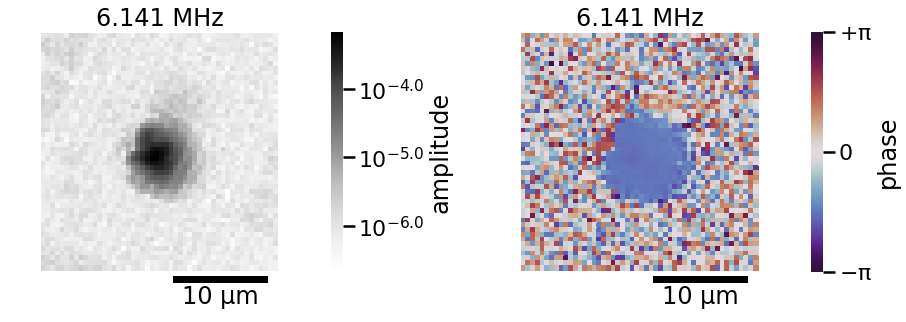

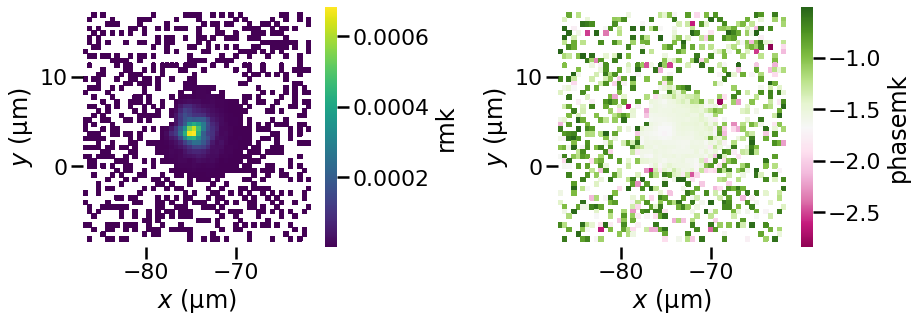

In [5]:
#Plot mode map of first driving frequency

if mac:
    folder1 = '/Volumes/Aleman-Lab/Group/Projects/GrapheneCoupledResonators/Data/Sample 3 2021/2021/11/12/'
else:
    folder1 = r'\\cas-fs1.uoregon.edu\Material-Science-Institute\Aleman-Lab\Group\Projects\GrapheneCoupledResonators\Data\Sample 3 2021\2021\11\12'
file1 = 'PosGU01ArrayB_r0.35p1.4Device0.2Drum1Drive155833'

path1 = os.path.join(folder1,file1)
print(path1)
df_map1, _, _, _, _ = openandplotmodemap(path1)

#Mask only R1

mkpos1 = df_map1.phase < -0.5

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13.23,5))

plt.sca(ax1)
maskplot(df_map1, mkpos1, 'r', cmap = 'viridis')

plt.sca(ax2)
maskplot(df_map1, mkpos1, 'phase', cmap = 'PiYG')

plt.tight_layout();

#Start table to append driving frequencies, amplitudes and phases
table = [['wDrive', 'Amp', 'Amp Error', 'Rad', 'Rad Error']]

#Assign values to variables
A1 = df_map1[mkpos1].nlargest(n_amp,['r']).r.mean()
p1 = df_map1[mkpos1].nlargest(n_phase,['r']).phase.mean()

A1_error = df_map1[mkpos1].nlargest(n_amp,['r']).r.std() / np.sqrt(n_amp)
p1_error = df_map1[mkpos1].nlargest(n_phase,['r']).phase.std() / np.sqrt(n_phase)

w1 = df_map1.w[1]

#Append info to table
table.append([w1, A1, A1_error, p1, p1_error])

#print the average mean and phase of largest 10 data point amplitudes
print('Average amplitude of R1: ', A1)
print('Error in amplitude of R1: ', A1_error)
print('Average phase of R1: ', p1)
print('Error in phase of R1: ', p1_error)
print('Driving Frequency in rad/s:', w1)

\\cas-fs1.uoregon.edu\Material-Science-Institute\Aleman-Lab\Group\Projects\GrapheneCoupledResonators\Data\Sample 3 2021\2021\11\12\PosGU01ArrayB_r0.35p1.4Device0.2Drum1Drive160446


<ipython-input-4-d857850611fc>:37: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar1.ax.set_yticklabels(['$10^{' + str(y) + '}$' for y in cbar_labels])


Saved to \\cas-fs1.uoregon.edu\Material-Science-Institute\Aleman-Lab\Group\Papers and Abstracts\Coupled Resonator Spatial Imaging\Figures\PosGU01ArrayB_r0.35p1.4Device0.2Drum1Drive160446.png
Low Average amplitude of R1:  0.0007858167
Low Average phase of R1:  1.8442816004
Low Driving Frequency in rad/s: 39864859.09103242


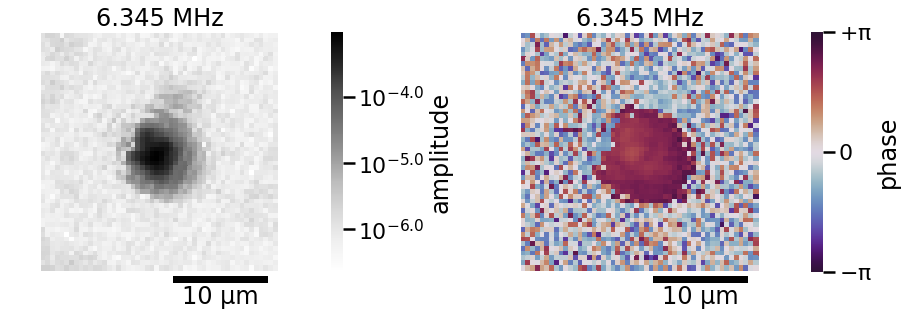

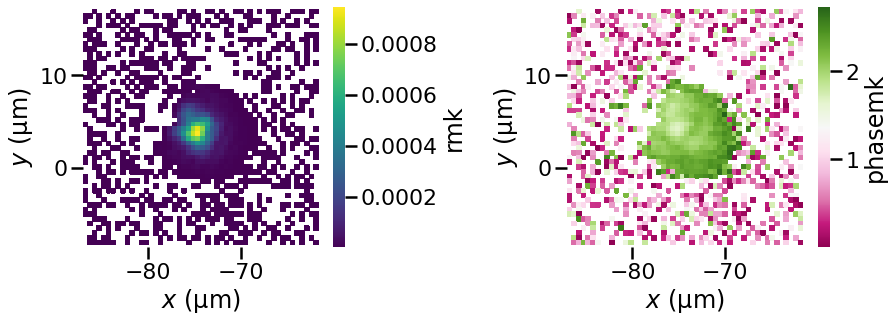

In [6]:
#Plot mode map of second driving frequency
file2 = 'PosGU01ArrayB_r0.35p1.4Device0.2Drum1Drive160446'

path2 = os.path.join(folder1,file2)
print(path2)
df_map2, _, _, _, _ = openandplotmodemap(path2)
#Mask only R1

mkpos2 = df_map2.phase > 0

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13.23,5))

plt.sca(ax1)
maskplot(df_map2, mkpos2, 'r', cmap = 'viridis')

plt.sca(ax2)
maskplot(df_map2, mkpos2, 'phase', cmap = 'PiYG')

plt.tight_layout();

#Assign values to variables
A2 = df_map2[mkpos2].nlargest(n_amp,['r']).r.mean()
p2 = df_map2[mkpos2].nlargest(n_phase,['r']).phase.mean()

A2_error = df_map2[mkpos2].nlargest(n_amp,['r']).r.std() / np.sqrt(n_amp)
p2_error = df_map2[mkpos2].nlargest(n_phase,['r']).phase.std() / np.sqrt(n_phase)

w2 = df_map2.w[1]

#Append info to table
table.append([w2, A2, A2_error, p2, p2_error])

#print the average mean and phase of largest 10 data point amplitudes
print('Low Average amplitude of R1: ', A2)
print('Low Average phase of R1: ', p2)
print('Low Driving Frequency in rad/s:', w2)

\\cas-fs1.uoregon.edu\Material-Science-Institute\Aleman-Lab\Group\Projects\GrapheneCoupledResonators\Data\Sample 3 2021\2021\11\12\PosGU01ArrayB_r0.35p1.4Device0.2Drum1Drive160952


<ipython-input-4-d857850611fc>:37: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar1.ax.set_yticklabels(['$10^{' + str(y) + '}$' for y in cbar_labels])


Saved to \\cas-fs1.uoregon.edu\Material-Science-Institute\Aleman-Lab\Group\Papers and Abstracts\Coupled Resonator Spatial Imaging\Figures\PosGU01ArrayB_r0.35p1.4Device0.2Drum1Drive160952.png
Low Average amplitude of R1:  0.0005133413
Low Average phase of R1:  1.2759954289000002
Low Driving Frequency in rad/s: 40167056.36537284


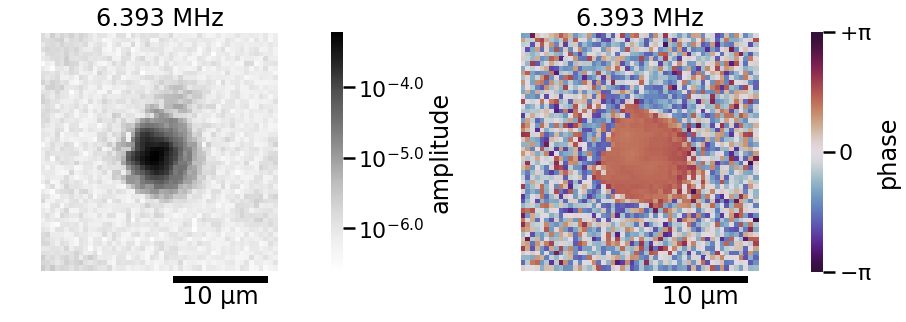

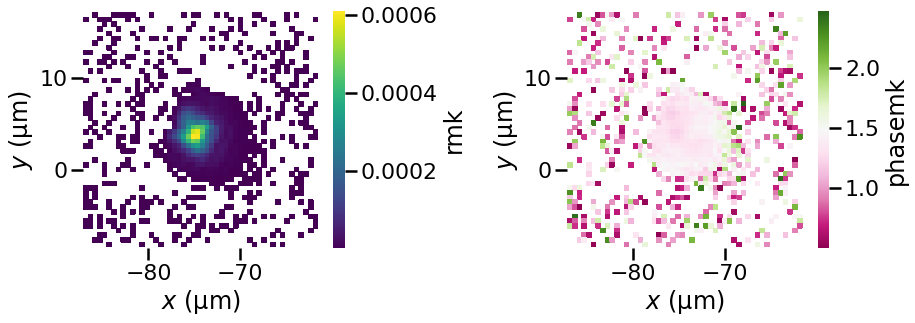

In [7]:
#Plot mode map of third driving frequency
file3 = 'PosGU01ArrayB_r0.35p1.4Device0.2Drum1Drive160952'

path3 = os.path.join(folder1,file3)
print(path3)
df_map3, _, _, _, _ = openandplotmodemap(path3)

#Mask only R1

mkpos3 = df_map3.phase > 0.5

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13.23,5))

plt.sca(ax1)
maskplot(df_map3, mkpos3, 'r', cmap = 'viridis')

plt.sca(ax2)
maskplot(df_map3, mkpos3, 'phase', cmap = 'PiYG')

plt.tight_layout();

#Assign values to variables
A3 = df_map3[mkpos3].nlargest(n_amp,['r']).r.mean()
p3 = df_map3[mkpos3].nlargest(n_phase,['r']).phase.mean()

A3_error = df_map3[mkpos3].nlargest(n_amp,['r']).r.std() / np.sqrt(n_amp)
p3_error = df_map3[mkpos3].nlargest(n_phase,['r']).phase.std() / np.sqrt(n_phase)

w3 = df_map3.w[1]

#Append info to table
table.append([w3, A3, A3_error, p3, p3_error])

#print the average mean and phase of largest 10 data point amplitudes
print('Low Average amplitude of R1: ', A3)
print('Low Average phase of R1: ', p3)
print('Low Driving Frequency in rad/s:', w3)

In [8]:
#Convert table to pandas data frame

df_vals = pd.DataFrame(table, columns = table[0])
df_vals = df_vals[1:].reset_index(drop = True)

df_vals

,wDrive,Amp,Amp Error,Rad,Rad Error
0,38583178.13261,0.000513,0.000034,-1.653752,0.01172
1,39864859.091032,0.000786,0.00003,1.844282,0.038223
2,40167056.365373,0.000513,0.000021,1.275995,0.010425


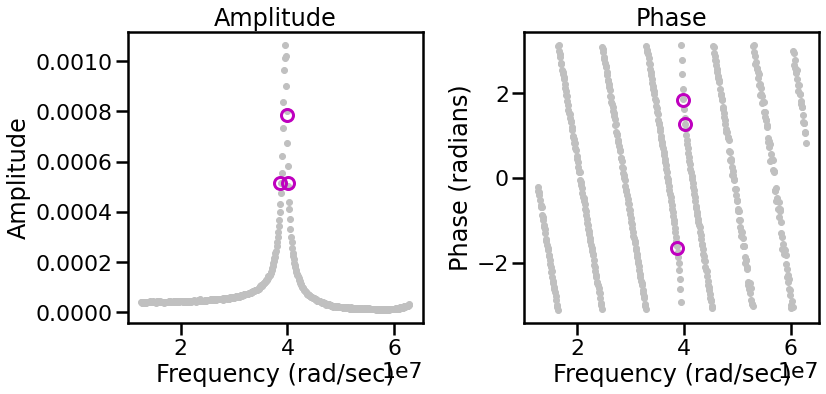

In [9]:
#Import and plot amplitude and phase spectra

if mac:
    base = '/Volumes/Aleman-Lab/Group/Projects/GrapheneCoupledResonators/Data/Sample 3 2021/Resonance Curves/'
else:
    base = r'\\cas-fs1.uoregon.edu\Material-Science-Institute\Aleman-Lab\Group\Projects\GrapheneCoupledResonators\Data\Sample 3 2021\Resonance Curves'
path = os.path.join(base, '2021_11_12r0.35p1.4Device1.2Drum1_2', 'Data.csv')

#Define column names for data frame

colnames = ['SweepVal', 'F', 'R', 'theta', 'NEP_BW', 'R_ref', 'theta_ref', 'Amp', 'Phase']
df = pd.read_csv(path, names = colnames)
df['rad'] = df.theta * np.pi / 180
df['w'] = df.F * 2 * np.pi
df['unwrap'] = np.unwrap(df.rad)

#Plot ampliutde and phase curves"
fig, (ax1, ax2) = plt.subplots(1, 2, figsize =(12,6))

ax1.plot(df.w, df.R, '.', color = 'silver')
ax1.set_xlabel('Frequency (rad/sec)')
ax1.set_ylabel('Amplitude')
ax1.set_title('Amplitude')

for i in range(df_vals.shape[0]):
    ax1.plot(df_vals.wDrive[i], df_vals.Amp[i], 'mo', fillstyle = 'none', markeredgewidth = 3)

ax2.plot(df.w, df.rad, '.', color = 'silver')
ax2.set_xlabel('Frequency (rad/sec)')
ax2.set_ylabel('Phase (radians)')
ax2.set_title('Phase')

for i in range(df_vals.shape[0]):
    ax2.plot(df_vals.wDrive[i], df_vals.Rad[i], 'mo', fillstyle = 'none', markeredgewidth = 3)

fig.tight_layout()

[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 10
    # data points      = 100
    # variables        = 2
    chi-square         = 0.08201384
    reduced chi-square = 8.3688e-04
    Akaike info crit   = -706.603745
    Bayesian info crit = -701.393404
[[Variables]]
    slope:     -7.5929e-07 +/- 9.9489e-10 (0.13%) (init = 0)
    intercept:  9.26934144 +/- 0.02504658 (0.27%) (init = 0)
[[Correlations]] (unreported correlations are < 0.100)
    C(slope, intercept) = -0.993


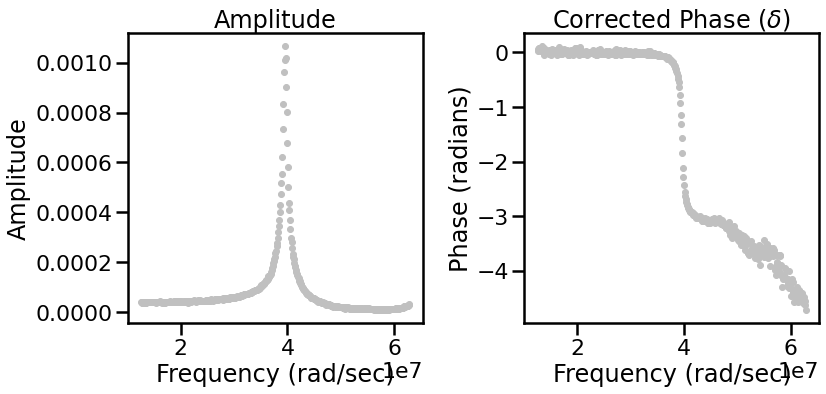

In [10]:
#Correct phase data

#NOTE: If you get error then you might need to adjust the mask bounds

#Fit linear part of phase to flatten
#mk = (df.F < 8*10**6) & (df.F > 6.5*10**6)
mk = (df.w < 3*10**7) & (df.w > 2*10**7)
mk2 = (df.w < 4.7*10**7) & (df.w > 3*10**7)

x = df.w[mk]
y = df.unwrap[mk]

#Perform linear fit
model = lmfit.models.LinearModel()
params = model.make_params(intercept = 0, slope = 0)
result = model.fit(y, params, x = x)


#Define linear phase, convert to radians, and unwrap
df['radLin'] = df.unwrap - result.best_values['intercept'] - result.best_values['slope'] * df.w

print(lmfit.fit_report(result))

#Plot ampliutde and phase curves"
fig, (ax1, ax2) = plt.subplots(1, 2, figsize =(12,6))

ax1.plot(df.w, df.R, '.', color = 'silver')
ax1.set_xlabel('Frequency (rad/sec)')
ax1.set_ylabel('Amplitude')
ax1.set_title('Amplitude')

#for i in range(df_vals.shape[0]):
    #ax1.plot(df_vals.wDrive[i], df_vals.Amp[i], 'mo', fillstyle = 'none', markeredgewidth = 3)

ax2.plot(df.w, df.radLin, '.', color = 'silver')
ax2.set_xlabel('Frequency (rad/sec)')
ax2.set_ylabel('Phase (radians)')
ax2.set_title('Corrected Phase ($\delta$)')

#for i in range(df_vals.shape[0]):
    #ax2.plot(df_vals.wDrive[i], df_vals.Rad[i], 'mo', fillstyle = 'none', markeredgewidth = 3)

fig.tight_layout()

[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 69
    # data points      = 336
    # variables        = 4
    chi-square         = 0.14383124
    reduced chi-square = 4.3323e-04
    Akaike info crit   = -2598.09186
    Bayesian info crit = -2582.82341
[[Variables]]
    Fn:  4.1662e-04 +/- 25.2674425 (6064884.74%) (init = 4e-07)
    k:   21.9010672 +/- 1328298.88 (6064996.15%) (init = 0.98)
    g:   968.036781 +/- 58711417.9 (6064998.68%) (init = 3)
    m:   140.030451 +/- 8492841.67 (6064996.30%) (init = 1)
[[Correlations]] (unreported correlations are < 0.100)
    C(k, m)  =  1.000
    C(g, m)  =  1.000
    C(k, g)  =  1.000
    C(Fn, m) =  1.000
    C(Fn, g) =  1.000
    C(Fn, k) =  1.000


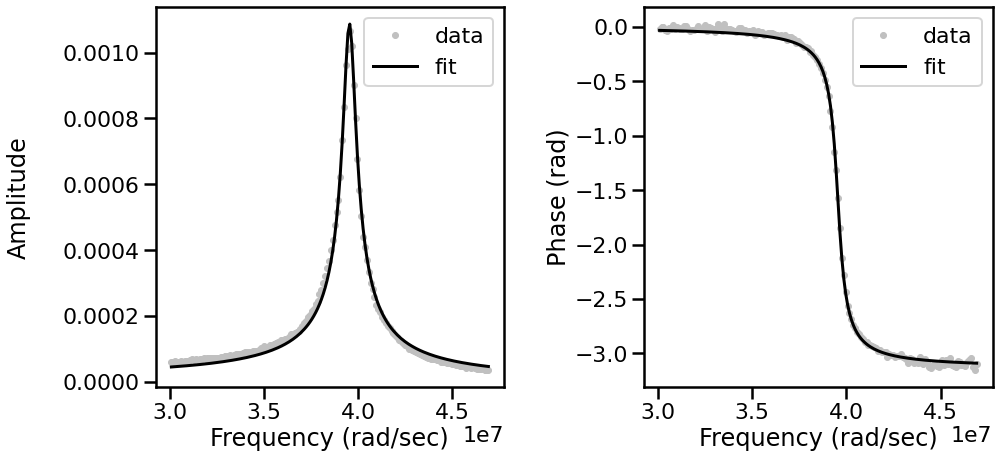

In [11]:
#Fit parameters F, k, g, and m

#Define amplitude function
def amplitude_fit(w, Fn, k, g, m):
    return Fn/np.sqrt((k-m*10**-16*w**2)**2+(w*g*10**-11)**2)

def phase_fit(w, k, g, m):
     return np.arctan2(-g*10**-11*w, (k-m*10**-16*w**2))
        
#Define input values
x = df.w[mk2].values
y = df.R[mk2].values
p = df.radLin[mk2].values

#Define redisule function
def residual(params, omega, data_amp, data_phase):
    Fn = params['Fn']
    k = params['k']
    g = params['g']
    m = params['m']
    
    model1 = amplitude_fit(omega, Fn, k, g, m)
    model2 = phase_fit(omega, k, g, m)
    
    resid1 = data_amp - model1
    resid2 = data_phase - model2
    
    return np.concatenate((resid1, resid2))

params = lmfit.Parameters()
params.add('Fn', value = 4*10**-7, min = 0)
params.add('k', value = 0.98, min = 0)
params.add('g', value = 3, min = 0)
params.add('m', value = 1, min = 0)

out = lmfit.minimize(residual, params, args = (x, y, p))

Fn = out.params['Fn'].value
k = out.params['k'].value
g = out.params['g'].value
m = out.params['m'].value

Fn_init = out.params['Fn'].init_value
k_init = out.params['k'].init_value
g_init = out.params['g'].init_value
m_init = out.params['m'].init_value

print(lmfit.fit_report(out))

#Plots for paper

sns.set_context('poster')

fig, ((ax1, ax2)) = plt.subplots(1, 2, figsize = (15,7))

ax1.plot(x, y, '.', color = 'silver')
ax1.plot(x, amplitude_fit(x, Fn, k, g, m), 'k-')
#ax1.plot(x, volt(x, Fn_init, k_init, g_init, m_init), 'g-')
ax1.set_xlabel('Frequency (rad/sec)')
ax1.set_ylabel('Amplitude\n')
ax1.legend(['data', 'fit', 'guess'])

ax2.plot(x, p, '.', color = 'silver')
ax2.plot(x, phase_fit(x, k, g, m), 'k-')
#ax2.plot(x, phase(x, k_init, g_init, m_init), 'g-')
ax2.set_xlabel('Frequency (rad/sec)')
ax2.set_ylabel('Phase (rad)')
ax2.legend(['data', 'fit'])

plt.subplots_adjust(hspace = 0.5, wspace = 0.4)

In [12]:
#Define function to calculate phase correction and complex amplitudes

phaseCor = []
phaseCor_error = []
ampComplex = []

def complexAmp(df, intercept, slope):
    
    #Correct phase with calculated intercept and slope from time delays
    p = df.Rad - (intercept + slope * df.wDrive)
    
    #Add corrected phase to table to append to dataframe
    phaseCor.append(p%(-2*np.pi))
    
    #Calculate phase error on corrected phase and apend to table 
    e = np.sqrt(df['Rad Error']**2 + result.params['intercept'].stderr**2 
                + df.wDrive**2 * result.params['slope'].stderr**2)
    
    phaseCor_error.append(e)

    #Use amplitude and corrected phase to calculate complex amplitude
    Z = df.Amp * np.exp(1j * p)
    
    #Add complex amplitude to table to append to dataframe
    ampComplex.append(Z)


for i in range(df_vals.shape[0]):
    complexAmp(df_vals.iloc[i], result.best_values['intercept'], result.best_values['slope']) 
    
df_vals['RadCor'] = np.transpose(phaseCor)
df_vals['ComplexAmp'] = np.transpose(ampComplex)
df_vals['RadCor Error'] = np.transpose(phaseCor_error)
    
df_vals

,wDrive,Amp,Amp Error,Rad,Rad Error,RadCor,ComplexAmp,RadCor Error
0,38583178.13261,0.000513,0.000034,-1.653752,0.01172,-0.476985,0.000456-0.000236j,0.047309
1,39864859.091032,0.000786,0.00003,1.844282,0.038223,-2.288974,-0.000517-0.000592j,0.060509
2,40167056.365373,0.000513,0.000021,1.275995,0.010425,-2.627806,-0.000447-0.000252j,0.048301


In [13]:
#Singular Value Decomposition

#Define values for SVD
Z1 = df_vals.ComplexAmp.loc[1]
Z2 = df_vals.ComplexAmp.loc[2]

#Define Matrix M

M = np.array([[-w1**2*np.real(Z1), -w1*np.imag(Z1), np.real(Z1), -1],
             [-w1**2*np.imag(Z1), w1*np.real(Z1), np.imag(Z1), 0],
             [-w2**2*np.real(Z2), -w2*np.imag(Z2), np.real(Z2), -1],
             [-w2**2*np.imag(Z2), w2*np.real(Z2), np.imag(Z2), 0]])

#SVD
u, s, vh = np.linalg.svd(M, full_matrices = True)

#Singular Value Decomposition

#Define values for SVD
Z1 = df_vals.ComplexAmp.loc[0]
Z2 = df_vals.ComplexAmp.loc[1]
Z3 = df_vals.ComplexAmp.loc[2]

#Define Matrix M

M = np.array([[-w1**2*np.real(Z1), -w1*np.imag(Z1), np.real(Z1), -1],
             [-w1**2*np.imag(Z1), w1*np.real(Z1), np.imag(Z1), 0],
             [-w2**2*np.real(Z2), -w2*np.imag(Z2), np.real(Z2), -1],
             [-w2**2*np.imag(Z2), w2*np.real(Z2), np.imag(Z2), 0],
             [-w3**2*np.real(Z3), -w3*np.imag(Z3), np.real(Z3), -1],
             [-w3**2*np.imag(Z3), w3*np.real(Z3), np.imag(Z3), 0]])

#SVD
u, s, vh = np.linalg.svd(M, full_matrices = True)

In [14]:
#Check singular value matrix to see if zero is a singular value
s

array([1.42618592e+12, 3.65793247e+04, 3.38228260e-01, 1.16870325e-06])

In [15]:
vh

array([[-1.00000000e+00,  2.55087738e-24,  6.57838181e-16,
         7.27741398e-13],
       [-1.78874402e-17,  1.00000000e+00,  1.87916993e-16,
        -2.45793943e-05],
       [ 7.27741340e-13,  2.45793942e-05, -8.40110478e-05,
         9.99999996e-01],
       [-7.18976496e-16, -2.06494071e-09, -9.99999996e-01,
        -8.40110477e-05]])

In [16]:
#View vh array and assign variables to proper row vector
vals = [['Normalized Mass', 'Normalized Damping', 'Normalized Spring Constant', 'Normalized Driving Force']]

[M, G, K, FD] = vh[3]

vals.append((M, G, K, FD))

print(tabulate(vals, headers = 'firstrow', tablefmt = 'fancy_grid'))

╒═══════════════════╤══════════════════════╤══════════════════════════════╤════════════════════════════╕
│   Normalized Mass │   Normalized Damping │   Normalized Spring Constant │   Normalized Driving Force │
╞═══════════════════╪══════════════════════╪══════════════════════════════╪════════════════════════════╡
│      -7.18976e-16 │         -2.06494e-09 │                           -1 │                -8.4011e-05 │
╘═══════════════════╧══════════════════════╧══════════════════════════════╧════════════════════════════╛


NameError: name 'amplitude' is not defined

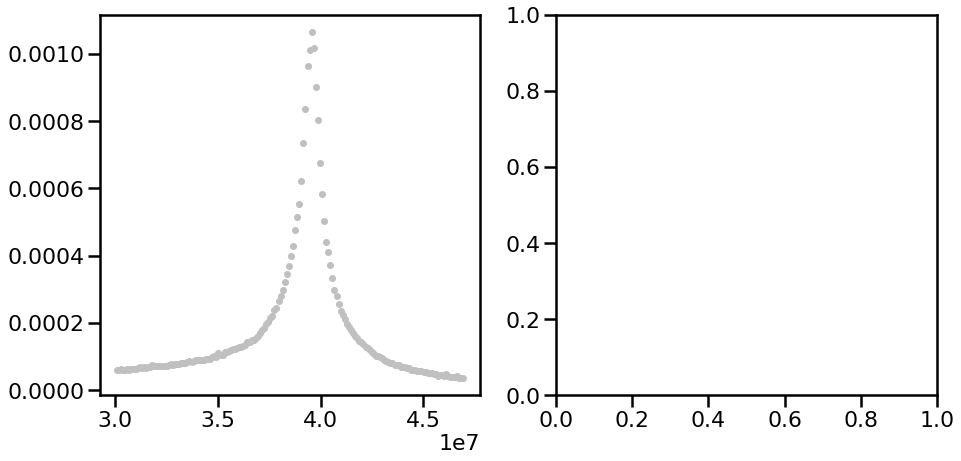

In [17]:
#Plot algebraic approach over spectra

sns.set_context('poster')

fig, ((ax1, ax2)) = plt.subplots(1, 2, figsize = (15,7))

ax1.plot(x, y, '.', color = 'silver')
ax1.plot(x, amplitude(x, K, G, FD, M), '--', color = 'black')
ax1.set_xlabel('Frequency (rad/sec)')
ax1.set_ylabel('Amplitude\n')
ax1.set_title('Amp of Driven Resonator')
#ax1.legend(['data', 'svd'])

for i in range(df_vals.shape[0]):
        ax1.plot(df_vals.wDrive[i], df_vals.Amp[i], 'mo', fillstyle='none', markeredgewidth = 3)

ax2.plot(x, p, '.', color = 'silver')
ax2.plot(x, phase(x, K, G, FD, M), '--', color = 'black')
ax2.set_xlabel('Frequency (rad/sec)')
ax2.set_ylabel('Phase (rad)')
ax2.set_title('Phase of Driven Resonator')
#ax2.legend(['data', 'svd'])

for i in range(df_vals.shape[0]):
        ax2.plot(df_vals.wDrive[i], df_vals.RadCor[i], 'mo', fillstyle='none', markeredgewidth = 3)

plt.subplots_adjust(hspace = 0.5, wspace = 0.4)

In [ ]:
#R^2 value calculation

#Amplitude
Amp_SSres = np.sum((y - amplitude(x, K, G, FD, M))**2)
Amp_SStot = np.sum((y - np.mean(y))**2)
Amp_Rsq = 1 - Amp_SSres/Amp_SStot

#Phase
Phase_SSres = np.sum((p - phase(x, K, G, FD, M))**2)
Phase_SStot = np.sum((p - np.mean(p))**2)
Phase_Rsq = 1 - Phase_SSres/Phase_SStot

print("R-squared value for Amplitude", Amp_Rsq)
print("R-squared value for phase", Phase_Rsq)

In [ ]:
#Plot algebraic approach over spectra

sns.set_context('poster')

fig = plt.figure(figsize = (25,12))

gs0 = gridspec.GridSpec(5,5)

gs00 = gridspec.GridSpecFromSubplotSpec(2,1, subplot_spec= gs0[0:3,0], hspace = 0)
ax1 = fig.add_subplot(gs00[0])
ax1.plot(df.F, df.R, '.', color = 'black')
ax1.set_ylabel('Amplitude\n')
ax1.set_title('Driven Resonator')

for i in range(df_vals.shape[0]):
        ax1.plot(df_vals.wDrive[i]/(2*np.pi), df_vals.Amp[i], 'mo', fillstyle='none', markeredgewidth = 3)

ax2 = fig.add_subplot(gs00[1])
ax2.plot(x, p, '.', color = 'black')
ax2.set_xlabel('Frequency (rad/sec)')
ax2.set_ylabel('Phase (rad)')

for i in range(df_vals.shape[0]):
        ax2.plot(df_vals.wDrive[i], df_vals.RadCor[i], 'mo', fillstyle='none', markeredgewidth = 3)

plt.subplots_adjust(hspace = 0.5, wspace = 0.4)

## Error Propogation

In [ ]:
#calculate complex errors for real and imaginary parts of complex amplitude

def complex_error(amplitude, amplitude_error, phase, phase_error):
    error_real = np.sqrt(np.cos(phase)**2 * amplitude_error**2 + (-amplitude * np.sin(phase))**2 * phase_error**2)
    error_imag = np.sqrt(np.sin(phase)**2 * amplitude_error**2 + (amplitude * np.cos(phase))**2 * phase_error**2)
    
    return error_real, error_imag

error1_real, error1_imag = complex_error(df_vals['Amp'][0], df_vals['Amp Error'][0], df_vals['RadCor'][0], df_vals['RadCor Error'][0])
error2_real, error2_imag = complex_error(df_vals['Amp'][1], df_vals['Amp Error'][1], df_vals['RadCor'][1], df_vals['RadCor Error'][1])
error3_real, error3_imag = complex_error(df_vals['Amp'][2], df_vals['Amp Error'][2], df_vals['RadCor'][2], df_vals['RadCor Error'][2])

In [ ]:
#Calculate real and imaginary gaussian distributions

def randomdistZ(Z_mean, Z_error_real, Z_error_imag, N, array):
    
    Z_real_rand = np.random.normal(np.real(Z_mean), Z_error_real, N)
    Z_imag_rand = np.random.normal(np.imag(Z_mean), Z_error_imag, N)
    
    Z = Z_real_rand + 1j * Z_imag_rand
    
    array.append(Z)
    
    return array

gaussianZ1 = []
gaussianZ2 = []
gaussianZ3 = []
gaussianZ4 = []

points = 1000

randomdistZ(df_vals.ComplexAmp.loc[0], error1_real, error1_imag, points, gaussianZ1)
randomdistZ(df_vals.ComplexAmp.loc[1], error2_real, error2_imag, points, gaussianZ2)
randomdistZ(df_vals.ComplexAmp.loc[2], error3_real, error3_imag, points, gaussianZ3)


sns.set_context('poster')

fig, ((ax1, ax2)) = plt.subplots(1, 2, figsize = (15,7))

markersize = 50

ax1.scatter(np.real(gaussianZ1), np.imag(gaussianZ1), s = markersize, color = 'silver', label = 'Z1')
ax1.scatter(np.real(gaussianZ2), np.imag(gaussianZ2), s = markersize, color = 'lightsteelblue', label = 'Z2')
ax1.scatter(np.real(gaussianZ3), np.imag(gaussianZ3), s = markersize, color = 'cornflowerblue', label = 'Z3')
ax1.set_xlabel('Real Amplitude')
ax1.set_ylabel('Imaginary Amplitude')
ax1.set_title('Complex Amplitude')
ax1.axis('square')
ax1.legend()

ax2.plot(np.real(gaussianZ2), np.imag(gaussianZ2), '.', color = 'silver')
ax2.set_xlabel('Real Z2')
ax2.set_ylabel('Imaginary Z2')
ax2.set_title('Complex Amplitude Z2')

plt.tight_layout()

In [ ]:
#Singular Value Decomposition for loop

error_prop = [['Normalized Mass', 'Normalized Damping', 'Normalized Spring Constant', 'Normalized Driving Force', 
               'Amp R^2', 'Phase R^2']]

for i in range(len(gaussianZ1[0])):

    Z1 = gaussianZ1[0][i]
    Z2 = gaussianZ2[0][i]
    Z3 = gaussianZ3[0][i]

    M = np.array([[-w1**2*np.real(Z1), -w1*np.imag(Z1), np.real(Z1), -1],
                 [-w1**2*np.imag(Z1), w1*np.real(Z1), np.imag(Z1), 0],
                 [-w2**2*np.real(Z2), -w2*np.imag(Z2), np.real(Z2), -1],
                 [-w2**2*np.imag(Z2), w2*np.real(Z2), np.imag(Z2), 0],
                 [-w3**2*np.real(Z3), -w3*np.imag(Z3), np.real(Z3), -1],
                 [-w3**2*np.imag(Z3), w3*np.real(Z3), np.imag(Z3), 0]])

    u, s, vh = np.linalg.svd(M, full_matrices = True)
    
    elements = vh[3].tolist()
    
    Amp_SSres = np.sum((y - amplitude(x, vh[3][2], vh[3][1], vh[3][3], vh[3][0]))**2)
    Amp_SStot = np.sum((y - np.mean(y))**2)
    Amp_Rsq = 1 - Amp_SSres/Amp_SStot
    
    elements.append(Amp_Rsq)

    Phase_SSres = np.sum((p - phase(x, vh[3][2], vh[3][1], vh[3][3], vh[3][0]))**2)
    Phase_SStot = np.sum((p - np.mean(p))**2)
    Phase_Rsq = 1 - Phase_SSres/Phase_SStot
    
    elements.append(Phase_Rsq)
    
    error_prop.append(elements)

In [ ]:
df_error = pd.DataFrame(error_prop, columns = error_prop[0])
df_error = df_error[1:].reset_index(drop = True)

df_error

In [ ]:
sns.set_context('paper')

fig, ((ax1, ax2, ax3)) = plt.subplots(1, 3, figsize = (15,5))

ax1.hist(np.abs(df_error['Normalized Mass']))
ax1.set_xlabel('Normalized Mass (kg)')
ax1.set_title('Absolute Value of Mass Distribution')

ax2.hist(np.abs(df_error['Normalized Damping']))
ax2.set_xlabel('Normalized Damping (kg/s)')
ax2.set_title('Absolute value of Damping Distribution')

ax3.hist(np.abs(df_error['Normalized Driving Force']))
ax3.set_xlabel('Normalized Driving Force (N)')
ax3.set_title('Absolute value of Driving Force')

print('Mass: ', df_error['Normalized Mass'].abs().mean(), '+/-', df_error['Normalized Mass'].abs().std())
print('Damping: ', df_error['Normalized Damping'].abs().mean(), '+/-', df_error['Normalized Damping'].abs().std())
print('Force: ', df_error['Normalized Driving Force'].abs().mean(), '+/-', df_error['Normalized Driving Force'].abs().std())

In [ ]:
sns.set_context('poster')

fig, ((ax1, ax2)) = plt.subplots(1, 2, figsize = (15,5))

ax1.hist(np.abs(np.real(df_error['Amp R^2'])))
ax1.set_xlabel('Amplitude R$^{2}$ value')
ax1.set_title('Amplitude R$^{2}$ Distribution')

ax2.hist(np.abs(df_error['Phase R^2']))
ax2.set_xlabel('Phase R$^{2}$ Value')
ax2.set_title('Phase R$^{2}$ Distribution Distribution')

print('Amplitude R^2: ', df_error['Amp R^2'].abs().mean(), '+/-', df_error['Amp R^2'].abs().std())
print('Phase R^2: ', df_error['Phase R^2'].abs().mean(), '+/-', df_error['Phase R^2'].abs().std())

In [ ]:
#Plot envelopes of min and max errors

#Singular Value Decomposition for loop

def svd(C1, Z1_error_real, Z1_error_imag, C2, Z2_error_real, Z2_error_imag, C3, Z3_error_real, Z3_error_imag):

    table = [['Normalized Mass', 'Normalized Damping', 'Normalized Spring Constant', 'Normalized Driving Force']]

    Z1 = C1 + Z1_error_real + Z1_error_imag
    Z2 = C2 + Z2_error_real + Z2_error_imag
    Z3 = C3 + Z3_error_real + Z3_error_imag
    
    M = np.array([[-w1**2*np.real(Z1), -w1*np.imag(Z1), np.real(Z1), -1],
                 [-w1**2*np.imag(Z1), w1*np.real(Z1), np.imag(Z1), 0],
                 [-w2**2*np.real(Z2), -w2*np.imag(Z2), np.real(Z2), -1],
                 [-w2**2*np.imag(Z2), w2*np.real(Z2), np.imag(Z2), 0],
                 [-w3**2*np.real(Z3), -w3*np.imag(Z3), np.real(Z3), -1],
                 [-w3**2*np.imag(Z3), w3*np.real(Z3), np.imag(Z3), 0]])

    u, s, vh = np.linalg.svd(M, full_matrices = True)
    
    table.append(vh[3].tolist())
    
    return table

maxerror_vals = svd(df_vals.ComplexAmp.loc[0], error1_real, error1_imag, 
                    df_vals.ComplexAmp.loc[1], error2_real, error2_imag, 
                    df_vals.ComplexAmp.loc[2], error3_real, error3_imag)

minerror_vals = svd(df_vals.ComplexAmp.loc[0], -error1_real, -error1_imag, 
                    df_vals.ComplexAmp.loc[1], -error2_real, -error2_imag, 
                    df_vals.ComplexAmp.loc[2], -error3_real, -error3_imag)

In [ ]:
maxerror_vals[1]

In [ ]:
vals

In [ ]:
#Plot algebraic approach over spectra

sns.set_context('poster')

fig, ((ax1, ax2)) = plt.subplots(1, 2, figsize = (15,7))

ax1.plot(x, y, '.', color = 'silver', label = 'data')
ax1.plot(x, amplitude(x, vals[1][2], vals[1][1], vals[1][3], vals[1][0]), '--', color = 'black', label = 'svd')
ax1.plot(x, amplitude(x, maxerror_vals[1][2], maxerror_vals[1][1], maxerror_vals[1][3], maxerror_vals[1][0]),
         '--', color = 'red', label = 'max error')
ax1.plot(x, amplitude(x, minerror_vals[1][2], minerror_vals[1][1], minerror_vals[1][3], minerror_vals[1][0]),
         '--', color = 'green', label = 'min error')
ax1.set_xlabel('Frequency (rad/sec)')
ax1.set_ylabel('Amplitude\n')
ax1.set_title('Amp of Driven Resonator')
ax1.legend()

for i in range(df_vals.shape[0]):
        ax1.plot(df_vals.wDrive[i], df_vals.Amp[i], 'mo', fillstyle='none', markeredgewidth = 3)

ax2.plot(x, p, '.', color = 'silver', label = 'data')
ax2.plot(x, phase(x, vals[1][2], vals[1][1], vals[1][3], vals[1][0]), '--', color = 'black', label = 'svd')
ax2.plot(x, phase(x, maxerror_vals[1][2], maxerror_vals[1][1], maxerror_vals[1][3], maxerror_vals[1][0]),
         '--', color = 'red', label = 'max error')
ax2.plot(x, phase(x, minerror_vals[1][2], minerror_vals[1][1], minerror_vals[1][3], minerror_vals[1][0]),
         '--', color = 'green', label = 'min error')
ax2.set_xlabel('Frequency (rad/sec)')
ax2.set_ylabel('Phase (rad)')
ax2.set_title('Phase of Driven Resonator')
ax2.legend()

for i in range(df_vals.shape[0]):
        ax2.plot(df_vals.wDrive[i], df_vals.RadCor[i], 'mo', fillstyle='none', markeredgewidth = 3)

plt.subplots_adjust(hspace = 0.5, wspace = 0.4)

## Standard Error evaluation

In [ ]:
#Write function to loop through averaging 1, 2, 3, ... points to calculate amplitude and phase
def map_average(dataframe_vals, mask, n):
    
    table = [['# of Points', 'Amp', 'Amp Error', 'Rad', 'Rad Error']]
    
    for i in range(n):
        A = dataframe_vals[mask].nlargest(i,['r']).r.mean()
        p = dataframe_vals[mask].nlargest(i,['r']).phase.mean()
    
        A_error = dataframe_vals[mask].nlargest(i,['r']).r.std() / np.sqrt(i)
        p_error = dataframe_vals[mask].nlargest(i,['r']).phase.std() / np.sqrt(i)

        table.append([i, A, A_error, p, p_error])
        
    dataframe_output = pd.DataFrame(table, columns = table[0])
    dataframe_output = dataframe_output[2:].reset_index(drop = True)
    
    return dataframe_output

#Run function through all three mode map sets

num_points = 30 

df1 = map_average(df_map1, mkpos1, num_points)
df2 = map_average(df_map2, mkpos2, num_points)
df3 = map_average(df_map3, mkpos3, num_points)

In [ ]:
#Plot error results as a function of number of points
sns.set_context('poster')

fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2, figsize=(12,12))

ax1.plot(df1['# of Points'], df1['Amp Error'], '.')
ax1.set_xlabel('Number of Points Averaged')
ax1.set_ylabel('Standard Error')
ax1.set_title('A1 Standard Error')

ax2.plot(df1['# of Points'], df1['Rad Error'], '.')
ax2.set_xlabel('Number of Points Averaged')
ax2.set_ylabel('Standard Error')
ax2.set_title('p1 Standard Error')

ax3.plot(df2['# of Points'], df2['Amp Error'], '.')
ax3.set_xlabel('Number of Points Averaged')
ax3.set_ylabel('Standard Error')
ax3.set_title('A2 Standard Error')

ax4.plot(df2['# of Points'], df2['Rad Error'], '.')
ax4.set_xlabel('Number of Points Averaged')
ax4.set_ylabel('Standard Error')
ax4.set_title('p2 Standard Error')

ax5.plot(df3['# of Points'], df3['Amp Error'], '.')
ax5.set_xlabel('Number of Points Averaged')
ax5.set_ylabel('Standard Error')
ax5.set_title('A3 Standard Error')

ax6.plot(df3['# of Points'], df3['Rad Error'], '.')
ax6.set_xlabel('Number of Points Averaged')
ax6.set_ylabel('Standard Error')
ax6.set_title('p3 Standard Error')

fig.tight_layout()

## Plot complex amplitudes of each point in spectra

In [ ]:
#Calculate complex amplitudes of spectra

df['Complex_amp'] = df.R * np.cos(df.radLin) + 1j * df.R * np.sin(df.radLin)


fig, ((ax1)) = plt.subplots(1, 1, figsize = (8,6))

ax1.plot(np.real(df.Complex_amp), np.imag(df.Complex_amp), '.', color = 'mediumblue')
ax1.set_xlabel('Real Amplitude')
ax1.set_ylabel('Imaginary Amplitude')
ax1.set_title('Complex Amplitude of Spectra')